## StoryVIZAI: Visual Storyboard Creation Tool

### Team Members:
### 1. Ankur Kaushal
### 2. Dyuti Dasmahapatra
### 3. Himanshu Sharma
### 4. Palak Gupta
### 5. Priyanshu Yadav

In [ ]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#### Section 01: Generating a story board on the basis of product description and usage

In [ ]:
!pip install hugchat

In [ ]:
from hugchat import hugchat
from hugchat.login import Login

# Log in to huggingface and grant authorization to huggingchat
EMAIL = "dyuti.dasmahapatra.21cse@bmu.edu.in"
PASSWD = ""
cookie_path_dir = "./cookies"
sign = Login(EMAIL, PASSWD)
cookies = sign.login(cookie_dir_path=cookie_path_dir, save_cookies=True)

# Create your ChatBot
chatbot = hugchat.ChatBot(cookies=cookies.get_dict())

In [ ]:
id = chatbot.new_conversation()
chatbot.change_conversation(id)

In [ ]:
user_input = input('> ')
response = ""

if user_input.lower() in ['', 'q', 'quit']:
    pass
elif user_input.lower() in ['c', 'change']:
    print('Choose a conversation to switch to:')
    print(chatbot.get_conversation_list())
elif user_input.lower() in ['n', 'new']:
    print('Clean slate!')
    id = chatbot.new_conversation()
    chatbot.change_conversation(id)
else:
    response = chatbot.chat(user_input)

print(response)


> i have a device that is used to helps monitor the medical records of a person.  i want to create a story board for it. it should start with the description of the person, how the person looks, eyes, hair color, skin tone, gender, age,, what is it wearing..  then the story should start: with different scenes. should only contain scene. nothing else. not even heading for the scene
 Person: Emily, a young woman in her mid-twenties with sparkling green eyes, radiant porcelain skin, and long, flowing auburn hair pulled back into a loose ponytail. She sports athletic attire consisting of form-fitting yoga pants and a moisture-wicking tank top, signifying her commitment to maintaining an active lifestyle.

Scene 1: Early Morning Meditation
Emily rises before sunrise, settling onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. Accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing tec

In [ ]:
person = {
    "name": "Emily",
    "description": "A young woman in her mid-twenties with sparkling green eyes, radiant porcelain skin, and long, flowing auburn hair pulled back into a loose ponytail. She sports athletic attire consisting of form-fitting yoga pants and a moisture-wicking tank top, signifying her commitment to maintaining an active lifestyle."
}

scenes = [
    {
        "title": "Early Morning Meditation",
        "description": "Emily rises before sunrise, settling onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. Accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus."
    },
    {
        "title": "Breakfast Nutrition Planning",
        "description": "Preparing breakfast, Emily peruses food options available within her connected refrigerator inventory. Based on recent blood sugar levels and macronutrient targets outlined by her health monitoring device, the intelligent appliance recommends several meal choices incorporating fresh produce and lean protein sources."
    },
    {
        "title": "Workplace Ergonomics Evaluation",
        "description": "Seated behind her desk at work, Emily utilizes her health monitoring device to analyze ergonomic considerations surrounding her office setup. Adjusting chair height, keyboard placement, and computer monitor orientation, she minimizes strain and discomfort while maximizing productivity throughout the day."
    },
    {
        "title": "Virtual Rehabilitative Therapy Session",
        "description": "Participating remotely in her weekly physical therapy session, Emily follows instructions delivered via audio cues transmitted through her headphones while executing prescribed exercises captured by her health monitoring device's integrated motion sensors. Real-time visualizations display alignment corrections, range of motion assessments, and muscular engagement quantification."
    },
    {
        "title": "Midday Stress Management Techniques",
        "description": "Feeling overwhelmed by afternoon deadlines, Emily employs her health monitoring device to guide her through progressive muscle relaxation techniques accompanied by biofeedback mechanisms. Monitoring heart rate variability, breath frequency, and galvanic skin response, she gradually returns to a calm, focused state conducive to sustained concentration."
    },
    {
        "title": "Evening Social Engagement",
        "description": "Joining friends for dinner at a local restaurant, Emily navigates menu selections using her health monitoring device's AI-powered nutritional guidance feature. Selecting dishes featuring whole foods prepared simply, she maintains balance amidst indulgent temptations presented by less desirable alternatives."
    },
    {
        "title": "Nightly Sleep Hygiene Practices",
        "description": "Prioritizing restful slumber, Emily relies on her health monitoring device to establish consistent bedtimes, manage ambient lighting, and regulate room temperature according to ideal parameters identified during previous REM cycle analyses. Moreover, winddown protocols incorporate relaxing soundscapes synchronized with diaphragmatic breathing exercises to encourage rapid entry into regenerative delta brainwave states."
    },
    {
        "title": "Periodic Longitudinal Review",
        "description": "Reviewing longitudinal data aggregated by her health monitoring device, Emily identifies trends, milestones, and opportunities for refinement across diverse aspects of her wellness journey. Celebrating accomplishments achieved thus far, she sets forth ambitious goals driven by intrinsic motivations, perpetuating continual advancement towards optimal functioning across emotional, intellectual, spiritual, and corporeal domains."
    }
]

#### Section 02: Generating images of each scene using a text-to-image model

In [ ]:
!pip install git+https://github.com/huggingface/diffusers
!pip install transformers accelerate safetensors

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-hikqwuzu
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-hikqwuzu
  Resolved https://github.com/huggingface/diffusers to commit 25caf24ef90fc44074f4fd3712f6ed5a1db4a5c3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=2025291 sha256=2df1b74e239b601f3d4280892653abbbb081d1adda789d4b357b78e9481412fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-kr42jmvd/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.2 MB/s eta

In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hugchat/hugchat.py", line 780, in _stream_query
    yield obj
GeneratorExit
Exception ignored in: <generator object ChatBot._stream_query at 0x7bd319edf8b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hugchat/hugchat.py", line 790, in _stream_query
    raise exceptions.ChatError(f"Failed to parse response: {res}")
hugchat.exceptions.ChatError: Failed to parse response: {"message":"Exceeded number of messages before login"}
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
name = person["name"]
des = person["description"]
scene = scenes[0]["description"]
product = "Emily has a black small tablet device"

In [ ]:
prompt = product+" "+ name + " " + des + " "+scene

In [ ]:
neg_prompt = "text,ugly, blurry, poor quality" # Negative prompt here
image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['onto her meditation cushion as she initiates her preferred guided practice through her health monitoring device. accurate biometric measurements ensure proper alignment and relaxation, reinforcing correct breathing techniques and mental focus.']


  0%|          | 0/50 [00:00<?, ?it/s]

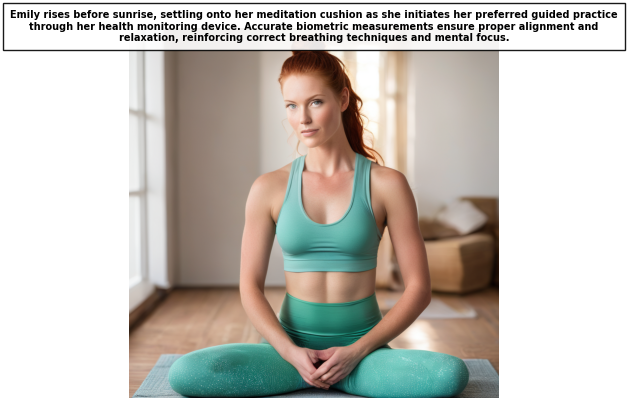

In [ ]:
image_np = np.array(image)

plt.imshow(image_np)
plt.axis('off')

text_box = plt.text(0.5, 1.05, scene, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)
text_box.set_position((0.5, 1.05))
plt.show()


In [ ]:
name = person["name"]
des = person["description"]
scene = scenes[1]["description"]
product = "Emily has a black small tablet device"

In [ ]:
prompt = product+" "+ name + " " + des + " "+scene

In [ ]:
neg_prompt = "text,ugly, blurry, poor quality" # Negative prompt here
image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['food options available within her connected refrigerator inventory. based on recent blood sugar levels and macronutrient targets outlined by her health monitoring device, the intelligent appliance recommends several meal choices incorporating fresh produce and lean protein sources.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['food options available within her connected refrigerator inventory. based on recent blood sugar levels and macronutrient targets outlined by her health monitoring device, the intelligent appliance recommends several meal choices incorporating fresh produce and lean protein sources.']


  0%|          | 0/50 [00:00<?, ?it/s]

#### Section 03: Displaying each scene

##### 1 - English

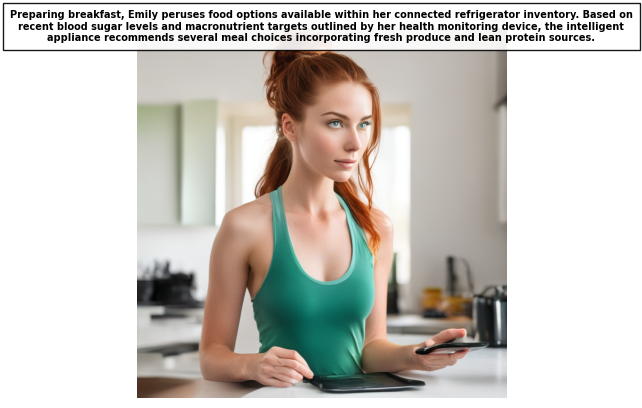

In [ ]:
image_np1 = np.array(image)

plt.imshow(image_np)
plt.axis('off')

text_box = plt.text(0.5, 1.05, scene, color='black', fontsize=7, fontweight='bold', ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)
text_box.set_position((0.5, 1.05))
plt.show()


##### 2 - Hindi

In [ ]:
!pip install easygoogletranslate

In [ ]:
from easygoogletranslate import EasyGoogleTranslate

translator = EasyGoogleTranslate(
    source_language='en',
    target_language='hi',
    timeout=10
)
result = translator.translate(scene)

print(result)
# Output: Dies ist ein Beispiel.

नाश्ता तैयार करते हुए, एमिली अपने कनेक्टेड रेफ्रिजरेटर इन्वेंट्री में उपलब्ध भोजन विकल्पों पर गौर करती है। हाल के रक्त शर्करा के स्तर और उसके स्वास्थ्य निगरानी उपकरण द्वारा उल्लिखित मैक्रोन्यूट्रिएंट लक्ष्यों के आधार पर, बुद्धिमान उपकरण ताजा उपज और दुबले प्रोटीन स्रोतों को शामिल करते हुए कई भोजन विकल्पों की सिफारिश करता है।


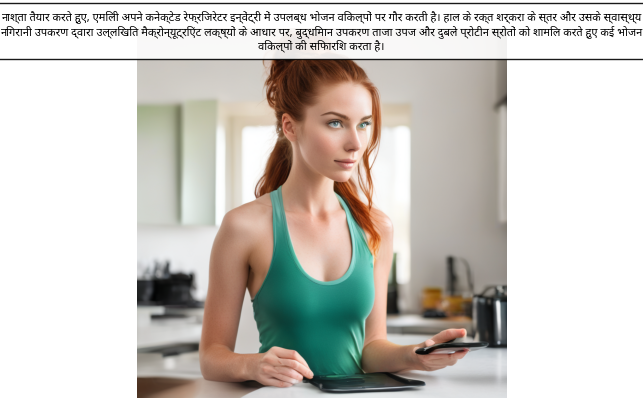

In [ ]:
plt.imshow(image_np)
plt.axis('off')

# Set the font properties
font_path = '/content/NotoSans-VariableFont_wdth,wght.ttf'
font_prop = FontProperties(fname=font_path, size=8)

# Create and position the text box
text_box = plt.text(0.5, 1.05, result, color='black', fontproperties=font_prop, ha='center', va='top', wrap=True, bbox=dict(facecolor='white', alpha=0.9, pad=5), transform=plt.gca().transAxes)
text_box.set_position((0.5, 1.05))

# Show the plot
plt.show()